In [113]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import src
from src.slow_eq import (
    JapanSlowSlipCatalog,
    XieSlowSlipCatalog,
    NishikawaSwarmCatalog,
    SlowSlipCatalog,
)
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
all_slow_slip_list = [slowslip() for slowslip in SlowSlipCatalog.__subclasses__()]
all_slow_slip = sum(all_slow_slip_list[1:],start=all_slow_slip_list[0]) # python vodoo to sum a list of catalogs

swarms = NishikawaSwarmCatalog()

In [115]:
dict(color="k", marker=".", linestyle="none", markersize=1)

{'color': 'k', 'marker': '.', 'linestyle': 'none', 'markersize': 1}

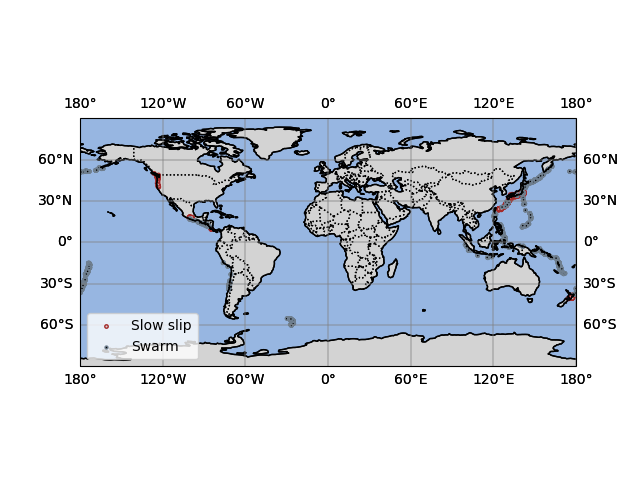

In [121]:
ax = all_slow_slip.plot_map()
swarms.plot_map(ax=ax, scatter_kwarg=dict(color="k",edgecolors="slategray"))
ax.set_extent([-180,180,-90,90])
ax.legend(["Slow slip","Swarm"])

## Japan

In [117]:
slowslip = JapanSlowSlipCatalog()
focus_areas = {
    'Southern Japan Trench': [
        [139,143],
        [34,37],
    ],
    'Nankai Trench': [
        [133,139],
        [32,36],
    ]
}
focus_area = focus_areas['Southern Japan Trench']

/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


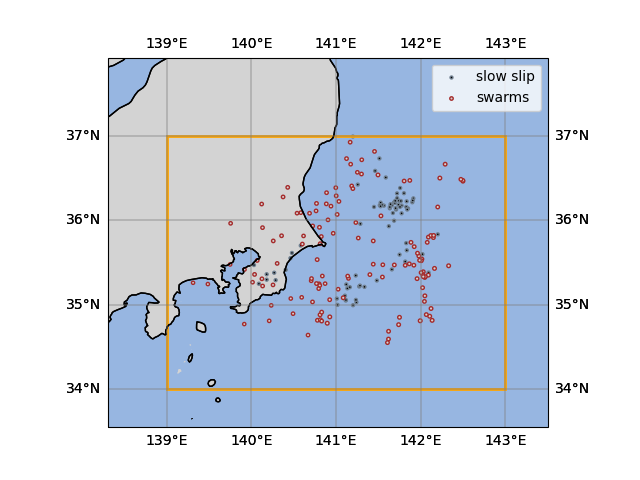

In [119]:
slowslip_focus, swarm_focus = [
    cat.get_space_slice(focus_area[1],focus_area[0]) 
    for cat in [slowslip,swarms]
]

ax = swarm_focus.plot_map(scatter_kwarg={"color":'k',"edgecolors":'slategrey'})
ax = slowslip_focus.plot_map(ax=ax)
ax.legend(["slow slip","swarms"])
ax.add_patch(mpl.patches.Rectangle((focus_area[0][0], focus_area[1][0]), np.diff(focus_area[0]),np.diff(focus_area[1]), edgecolor='orange',
   facecolor='none', linewidth=2,transform=ccrs.Geodetic()))

/Users/kdascher/miniforge3/envs/torchETAS/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


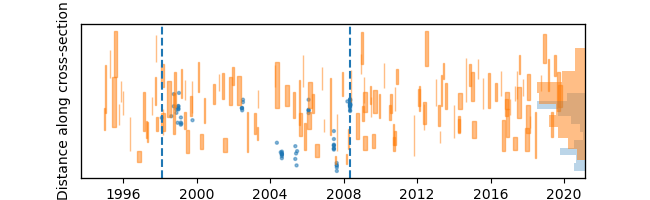

In [120]:
fig,ax = plt.subplots(figsize=(6.5,2))
p1,p2 = [
    [slowslip_focus.longitude_range[0],slowslip_focus.latitude_range[0]],
    [slowslip_focus.longitude_range[1],slowslip_focus.latitude_range[1]]
]

swarm_focus.plot_space_time_series(ax=ax)
slowslip_focus.plot_space_time_series(ax=ax,kwargs={'color':'C1'})
ax.axvline(swarm_focus.start_time,color='C0',linestyle='--')
ax.axvline(swarm_focus.end_time,color='C0',linestyle='--')